# Linear Regression with Advertising Data

Practice from **An Introduction to Statistical Learning**

Suppose that in our role as statistical consultants we are asked to suggest, on the basis of this data, a marketing plan for next year that will result in high product sales. What information would be useful in order to provide such a recommendation? Here are a few important questions that we might seek to address:


###  <a id='toc'> Table of Contents </a>
> 1. [Access Data](#1)
> 1. [Table Details](#2)
> 1. [Explore Relationships](#3)
> 1. [Simple Linear Regression](#4)
> 1. [Multiple Linear Regression](#5)

In [143]:

    1. Is there a relationship between advertising budget and sales?
Our first goal should be to determine whether the data provide evidence of an association between advertising expenditure and sales. Ifthe evidence is weak, then one might argue that no money should be spent on advertising!


SyntaxError: invalid syntax (<ipython-input-143-97b0cf18a649>, line 2)

In [144]:
import os


## Data processing
import pandas as pd


## Data visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

%matplotlib inline
#plt.style.use('seaborn-white')

## Statistics
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [145]:
path=os.getcwd()

In [146]:
path

'C:\\Users\\pestyl\\OneDrive - SAS\\github repos\\Data Projects\\Advertising'

##  <a id='1'> 1. Access Data </a>
[Back to the top](#toc)

Import the CSV files. Ignore the first column (0).

In [147]:
adv = pd.read_csv(path + '\\data\\Advertising.csv', usecols=[1,2,3,4])

In [148]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##  <a id='2'> 2. Table Details </a>
[Back to the top](#toc)

Total colummns and rows in the table.

In [149]:
adv.shape

(200, 4)

In [150]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Look for missing values

In [151]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [152]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


##  <a id='3'> 3. Explore Relationships </a>
[Back to the top](#toc)

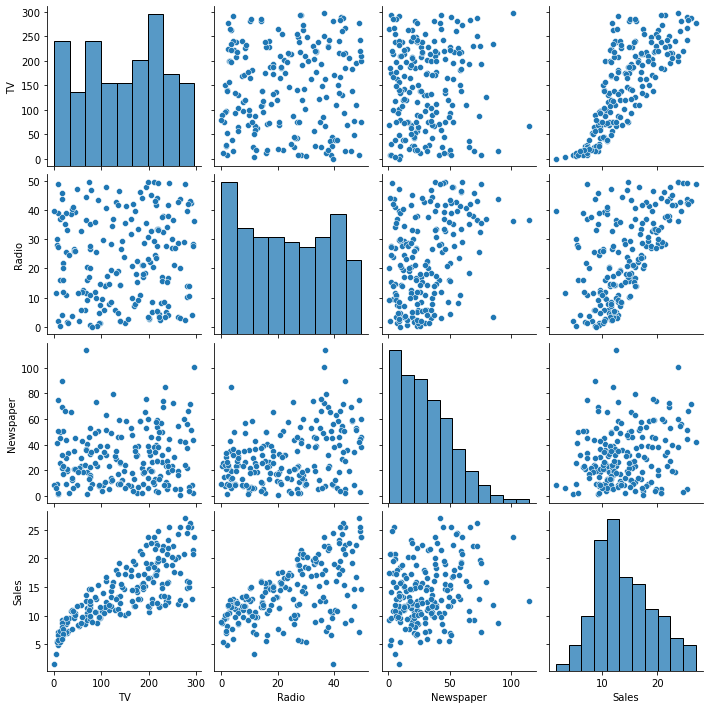

In [154]:
sns.pairplot(adv)

In [155]:
adv.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


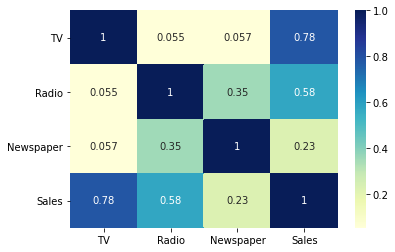

In [160]:
sns.heatmap(adv.corr(), cmap="YlGnBu", annot=True);

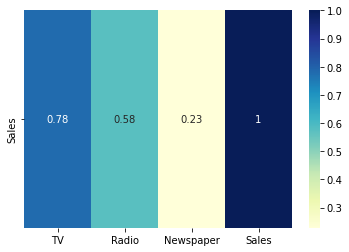

In [171]:
corrSales = adv.corr().filter(like='Sales', axis=0)
sns.heatmap(corrSales, cmap="YlGnBu", annot=True);

##  <a id='4'> 4. Simple Linear Regression </a>
[Back to the top](#toc)

In [120]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

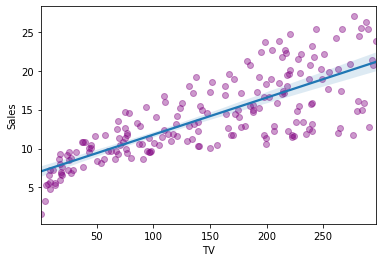

In [123]:
## set variables for regplot
tv = adv.TV
sales = adv.Sales

fig, ax = plt.subplots()
sns.regplot(x=tv, y=sales, data=adv, scatter_kws={'color':'purple', 'alpha':.4}, ax=ax)

In [124]:
# Regression coefficients (Ordinary Least Squares)

## Create the LM object
regr = skl_lm.LinearRegression()


# Set the inputs and response
X = adv[['TV']]
y = adv.Sales


# Fit the line
regr.fit(X,y)

# View the intercept and coef
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


Get the R-Squared value by applying the model using the TV budget

In [125]:
sales_pred = regr.predict(X)
r2_score(y, sales_pred)

0.611875050850071

In [126]:
est = smf.ols('Sales ~ TV', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.47e-42
Time:                        16:18:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TV Predictor** 

For the Advertising data, coefficients of the least squares model for the regression of number of units sold on TV advertising budget. An increase of $1,000 in the TV advertising budget is associated with an increase in sales by around 50 units. (Recall that the sales variable is in thousands of units, and the TV variable is in thousands of dollars.)

A small p-value for the intercept indicates that we can reject the null hypothesis that β0 = 0, and a small p-value for TV indicates that we can reject the null hypothesis that β1 = 0. Rejecting the latter null hypothesis allows us to conclude that there is a relationship between TV and sales. Rejecting the former allows us to conclude that in the absence of TV expenditure, sales are non-zero.

In [127]:
est = smf.ols('Sales ~ Radio', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           4.35e-19
Time:                        16:18:31   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
est = smf.ols('Sales ~ Newspaper', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 15 Aug 2021   Prob (F-statistic):            0.00115
Time:                        16:18:43   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  <a id='5'> 5. Multiple Linear Regression </a>
[Back to the top](#toc)

In [136]:
est = smf.ols('Sales ~ TV + Newspaper + Radio', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        16:23:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
est = smf.ols('Sales ~ TV + Radio', adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        16:45:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""